# Comparing the ROI of movies to their budgets

## Importing the Correct Dataset

In [89]:
### Import the nessesary libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [90]:
df = pd.read_csv('data/df_budget.csv', index_col=0)
df.head()

,Primary_Title,Original_Title,AVG_Rating,Num_Votes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_millions,budget_binning
0,The Legend of Hercules,The Legend of Hercules,4.2,50352,42,"Jan 10, 2014",The Legend of Hercules,"$70,000,000","$18,848,538","$58,953,319",70.00,64
1,The Hammer,Hamill,7.0,1613,50,"Mar 21, 2008",The Hammer,"$850,000","$442,638","$442,638",0.85,1
3,Baggage Claim,Baggage Claim,5.1,8296,38,"Sep 27, 2013",Baggage Claim,"$8,500,000","$21,569,509","$22,885,836",8.50,8
4,Moneyball,Moneyball,7.6,326657,15,"Sep 23, 2011",Moneyball,"$50,000,000","$75,605,492","$111,300,835",50.00,32
5,Hereafter,Hereafter,6.5,87288,61,"Oct 15, 2010",Hereafter,"$50,000,000","$32,746,941","$108,660,270",50.00,32


## Clean the data for budget, domestic_gross, worldwide_gross

In [91]:
#Domestic
df['domestic_millions'] = df.domestic_gross.str.replace(',','')
df['domestic_millions'] = df.domestic_millions.str.replace('$','')
df['domestic_millions'] = pd.to_numeric(df.domestic_millions) / 1000000

#Worldwide
df['worldwide_millions'] = df.worldwide_gross.str.replace(',','')
df['worldwide_millions'] = df.worldwide_millions.str.replace('$','')
df['worldwide_millions'] = pd.to_numeric(df.worldwide_millions) / 1000000

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Primary_Title       2126 non-null   object 
 1   Original_Title      2126 non-null   object 
 2   AVG_Rating          2126 non-null   float64
 3   Num_Votes           2126 non-null   int64  
 4   id                  2126 non-null   int64  
 5   release_date        2126 non-null   object 
 6   movie               2126 non-null   object 
 7   production_budget   2126 non-null   object 
 8   domestic_gross      2126 non-null   object 
 9   worldwide_gross     2126 non-null   object 
 10  budget_millions     2126 non-null   float64
 11  budget_binning      2126 non-null   int64  
 12  domestic_millions   2126 non-null   float64
 13  worldwide_millions  2126 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 249.1+ KB


## Create the ROI Column using budget and worldwide

In [92]:
df['roi'] = (df.worldwide_millions - df.budget_millions)/df.budget_millions
df.head()

,Primary_Title,Original_Title,AVG_Rating,Num_Votes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_millions,budget_binning,domestic_millions,worldwide_millions,roi
0,The Legend of Hercules,The Legend of Hercules,4.2,50352,42,"Jan 10, 2014",The Legend of Hercules,"$70,000,000","$18,848,538","$58,953,319",70.00,64,18.848538,58.953319,-0.157810
1,The Hammer,Hamill,7.0,1613,50,"Mar 21, 2008",The Hammer,"$850,000","$442,638","$442,638",0.85,1,0.442638,0.442638,-0.479249
3,Baggage Claim,Baggage Claim,5.1,8296,38,"Sep 27, 2013",Baggage Claim,"$8,500,000","$21,569,509","$22,885,836",8.50,8,21.569509,22.885836,1.692451
4,Moneyball,Moneyball,7.6,326657,15,"Sep 23, 2011",Moneyball,"$50,000,000","$75,605,492","$111,300,835",50.00,32,75.605492,111.300835,1.226017
5,Hereafter,Hereafter,6.5,87288,61,"Oct 15, 2010",Hereafter,"$50,000,000","$32,746,941","$108,660,270",50.00,32,32.746941,108.660270,1.173205


In [101]:
# Pushing the cleaned data file to the data folder
# df.to_csv('data/df_roi.csv')

## Visualizations

C:\Users\samumartin\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


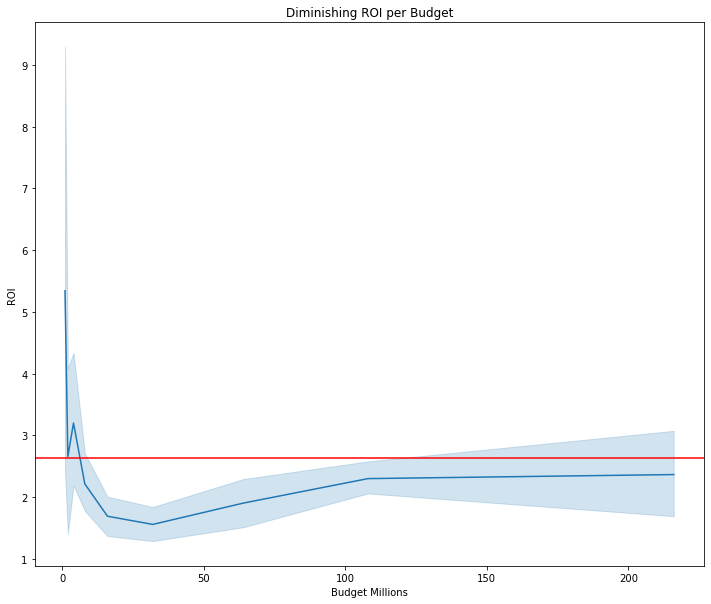

In [93]:
#Cluster Plot of the ROI to budget
# sns.histplot(y=df.roi,
#              x=df.worldwide_millions)
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.lineplot(df.budget_binning, df.roi)
ax.set(xlabel='Budget Millions', ylabel='ROI', title='Diminishing ROI per Budget')
ax.axhline(df.roi.mean(), color='red')

## Removing outliers

In [94]:
df.roi.describe()

count    2126.000000
mean        2.627956
std        13.627146
min        -1.000000
25%        -0.635096
50%         0.685090
75%         2.644018
max       415.564740
Name: roi, dtype: float64

In [95]:
dist = stats.norm(df.roi.mean(),df.roi.std())

In [96]:
dist.ppf(.97)

28.2578042725374

### Notes from observations of the data
- Would only be interested in movies with an ROI under 28 considering that originally would account for 97% of our mass function

In [97]:
#Drop ROI's where the roi is > 3
df.drop(df[df['roi'] > 28].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2874
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Primary_Title       2104 non-null   object 
 1   Original_Title      2104 non-null   object 
 2   AVG_Rating          2104 non-null   float64
 3   Num_Votes           2104 non-null   int64  
 4   id                  2104 non-null   int64  
 5   release_date        2104 non-null   object 
 6   movie               2104 non-null   object 
 7   production_budget   2104 non-null   object 
 8   domestic_gross      2104 non-null   object 
 9   worldwide_gross     2104 non-null   object 
 10  budget_millions     2104 non-null   float64
 11  budget_binning      2104 non-null   int64  
 12  domestic_millions   2104 non-null   float64
 13  worldwide_millions  2104 non-null   float64
 14  roi                 2104 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 263.0+

C:\Users\samumartin\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


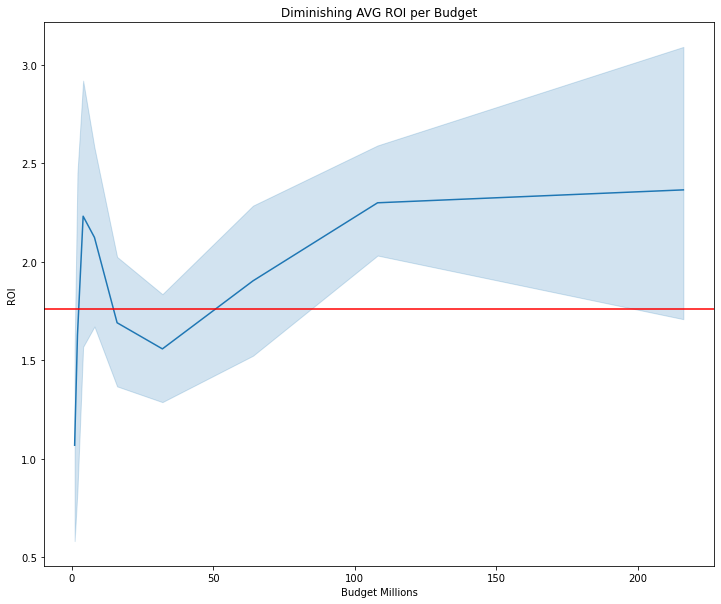

In [98]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.lineplot(df.budget_binning, df.roi)
ax.set(xlabel='Budget Millions', ylabel='ROI', title='Diminishing AVG ROI per Budget')
ax.axhline(df.roi.mean(), color='red')